#### Project Recomendation System
By Ajay Kumar

### Problem Statement

India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India 
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by 
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has 
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they 
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the 
right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system 
based on individual consumer’s behaviour or choice.

### Data Dictionary

# New Section

DATA DESCRIPTION: 

• author : name of the person who gave the rating

• country : country the person who gave the rating belongs to

• data : date of the rating

• domain: website from which the rating was taken from

• extract: rating content

• language: language in which the rating was given

• product: name of the product/mobile phone for which the rating was given

• score: average rating for the phone

• score_max: highest rating given for the phone

• source: source from where the rating was taken

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the Libraries

In [3]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Q1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. 
#### 1(a) Merge the provided CSVs into one data-frame.

In [4]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/AIML PROJECT/RECOMENDATION/Data.csv")

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_df = pd.concat([pd.read_csv(f) for f in all_filenames ])

Merged all the csv files using glob library

In [5]:
print(combined_df.shape)
combined_df.head()

(1415133, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,05-02-2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,05-04-2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,05-02-2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,05-11-2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


There are 1415133 entries and 11 columns in the Dataset

#### 1(b) Check a few observations and shape of the data-frame.

In [6]:
print(combined_df.shape)
combined_df.head(1)

(1415133, 11)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,05-02-2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


The information command is describing the presence of null values, data types and 1415133 entries, 0 to 163836 and total 11 columns

In [8]:
# Checking the value counts of the varibles to check the presence of niosy data
col = ['lang', 'country', 'source', 'domain', 'score','score_max', 'product']
for feature in combined_df[col]:
  print(feature, 'Number of levels', combined_df[feature].nunique())
  print(combined_df[feature].value_counts())
  print('\n')

lang Number of levels 22
en    554746
ru    207443
de    176600
it    116120
es     99739
fr     95080
pt     67155
nl     38375
tr     28359
sv     17149
fi      6953
cs      2533
no      1918
he      1370
pl       493
da       418
hu       346
id       271
ja        33
zh        19
ar        12
ko         1
Name: lang, dtype: int64


country Number of levels 42
us    318435
de    176525
ru    174945
in    127876
it    116120
gb     95795
fr     95080
es     76271
br     63975
ua     32498
tr     28359
nl     25716
se     17149
ar     15636
be     12659
ca     11118
fi      6953
pt      3180
mx      3142
cz      2533
no      1918
ec      1478
au      1413
il      1370
co      1350
uy       725
cl       603
pl       493
dk       418
ve       389
hu       346
id       271
pe       145
ch        75
nz        74
jp        33
za        25
tw        14
ae        12
sg        10
cn         5
kr         1
Name: country, dtype: int64


source Number of levels 331
Amazon           728471
Yandex

#### 1(c) Round off scores to the nearest integers.

In [9]:
combined_df['score'].unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

In [10]:
combined_df['score'] = combined_df['score'].round()
combined_df['score'].unique()

array([10.,  6.,  9.,  4.,  8.,  2.,  7.,  5., nan,  3.,  1.,  0.])

Varible score rounded to the nearest integer ranging from 0 to 10

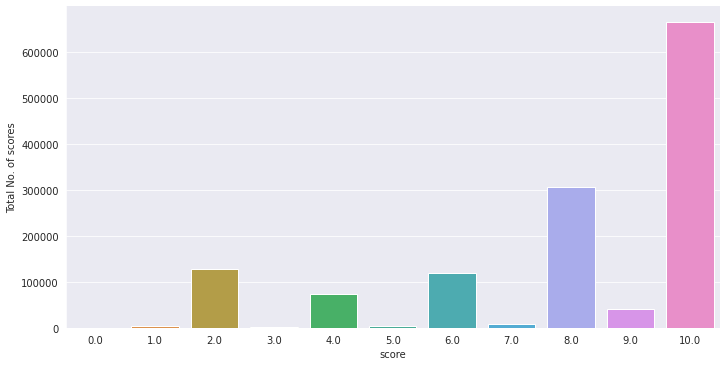

In [11]:
with sns.axes_style('darkgrid', ):
  g = sns.factorplot('score', data=combined_df, aspect =2.0, kind = 'count')
  g.set_ylabels('Total No. of scores')

The factorplot of the score variable gives us the no. of counts for each scores. The maximum scores is 10 and minimum is 0.

In [12]:
combined_df['score'].describe().round().T

count    1351644.0
mean           8.0
std            3.0
min            0.0
25%            7.0
50%            9.0
75%           10.0
max           10.0
Name: score, dtype: float64

#### 1 (d) Check for missing values. Impute the missing values if there is any

In [13]:
combined_df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

Ther are five variables which have null values. Imputing the null values by mean of the variables.  

In [14]:
# Replacing the nan value of score and score_max variable with their mean value.
combined_df['score'] = combined_df['score'].replace(np.nan ,combined_df['score'].mean() )
combined_df['score_max'] = combined_df['score_max'].replace(np.nan ,combined_df['score_max'].mean() )

In [15]:
# Droping the nan value of extract and author variable
combined_df.isnull().sum()
combined_df.dropna(inplace=True)
combined_df.isnull().sum().any()

False

1 (e) Check for duplicate values and remove them if there is any.

In [16]:
combined_df.duplicated().sum()

4823

In [17]:
combined_df.drop_duplicates(inplace=True)
combined_df.duplicated().sum()

0

There are 4823 duplcate values in the dataset. Droping all the by using python command drop_duplicated 

#### 1(f) Keep only 1000000 data samples. Use random state=612.

In [18]:
df = combined_df.sample(n = 1000000, random_state=612)
print(df.shape)

(1000000, 11)


#### 1(g) Drop irrelevant features. Keep features like Author, Product, and Score

In [19]:
df = df[['author', 'product', 'score']]
# df.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
print(df.shape)
df.head()

(1000000, 3)


,author,product,score
8765,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint),10.0
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
145859,ron,×˜×œ×¤×•×Ÿ ×¡×œ×•×œ×¨×™ Huawei Mate S 32GB,10.0
302180,katha_maria93,Sony Ericsson W395 blush titanium Handy,8.0
304586,paul george,Apple iPhone 3G 8GB SIM-Free - Black,2.0


# 2 Answer the following questions
#### 2(a) Identify the most rated features

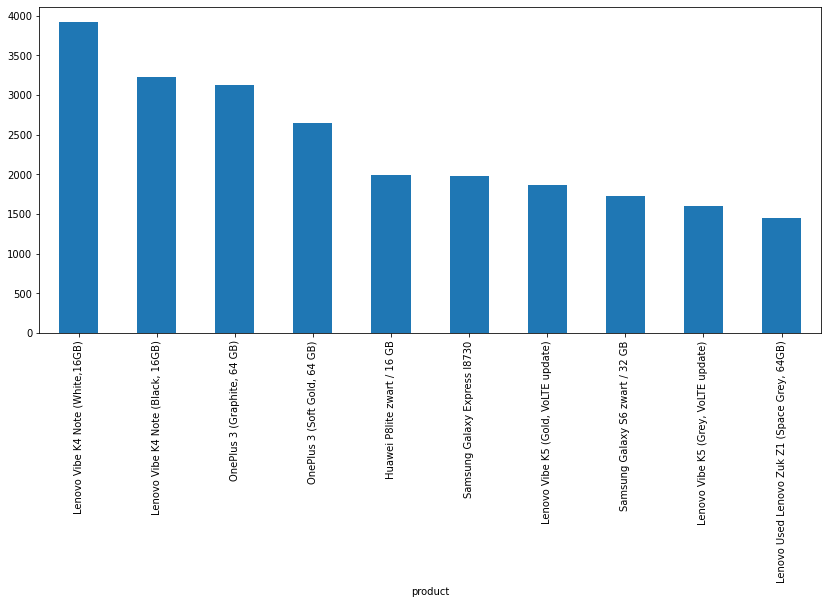

In [20]:
df.groupby('product')['score'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(14,6));

The most rated product is Lenovo Vibe K4 Note (white, 16 GB) and so on so forth as shown in the figure above

#### 2 (b) Identify the users with most number of reviews.

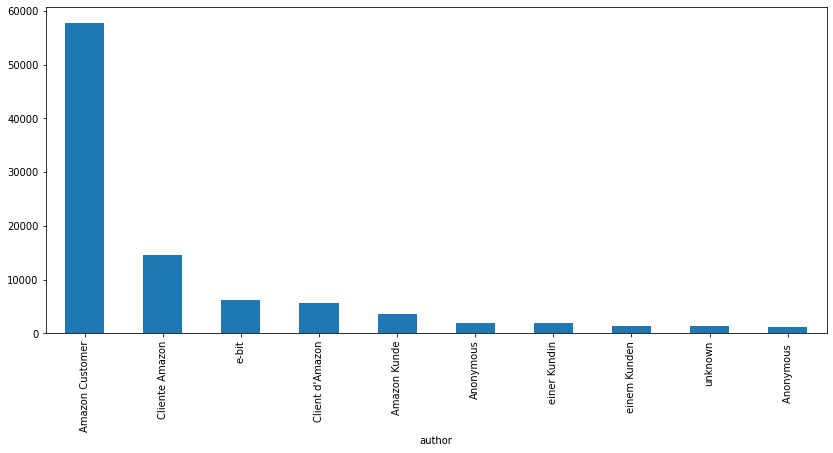

In [21]:
df.groupby('author')['score'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(14,6));

The user which has given most scores is Amazon customer  and so on so forth as shown in the figure above

#### 2 (c) Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [22]:
df1 = df.groupby('product').filter(lambda x:x['score'].count() > 50)

In [23]:
print(df1.shape)
df1.head()

(559498, 3)


,author,product,score
8765,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint),10.0
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
28860,stephensca,Samsung Galaxy S7 32GB (Verizon),10.0
183941,martinsa,Sony Xperia Z C6603,8.0
197969,MoneyMike,Samsung Galaxy S4 16GB (T-Mobile),10.0


In [24]:
df1['product'].value_counts()

Lenovo Vibe K4 Note (White,16GB)                                                                                 3913
Lenovo Vibe K4 Note (Black, 16GB)                                                                                3228
OnePlus 3 (Graphite, 64 GB)                                                                                      3127
OnePlus 3 (Soft Gold, 64 GB)                                                                                     2643
Huawei P8lite zwart / 16 GB                                                                                      1994
                                                                                                                 ... 
Wiko Fever Smartphone dÃ©bloquÃ© 4G (Ecran: 5,2 pouces - 16 Go - Double SIM - Android 5.1 Lollipop) Noir/Gris      51
Samsung S380C Prepaid Phone (Net10)                                                                                51
Huawei Ascend G300                                      

In [25]:
df2 = df1.groupby('author').filter(lambda x:x['score'].count() > 50)
df2['author'].value_counts()

Amazon Customer    43662
Cliente Amazon      7504
e-bit               5049
Client d'Amazon     2758
Amazon Kunde        2312
                   ...  
giovanni              52
bumudur               51
michele               51
laura                 51
Ricardo               51
Name: author, Length: 286, dtype: int64

In [26]:
# Final shape of the Dataset with products having more than 50 ratings and users who have given more than 50 ratings. 
df2.shape

(96150, 3)

I have used lambda funtion to extract the information. The final shape is (96150, 3)

# 3. Build a popularity based model and recommend top 5 mobile phones

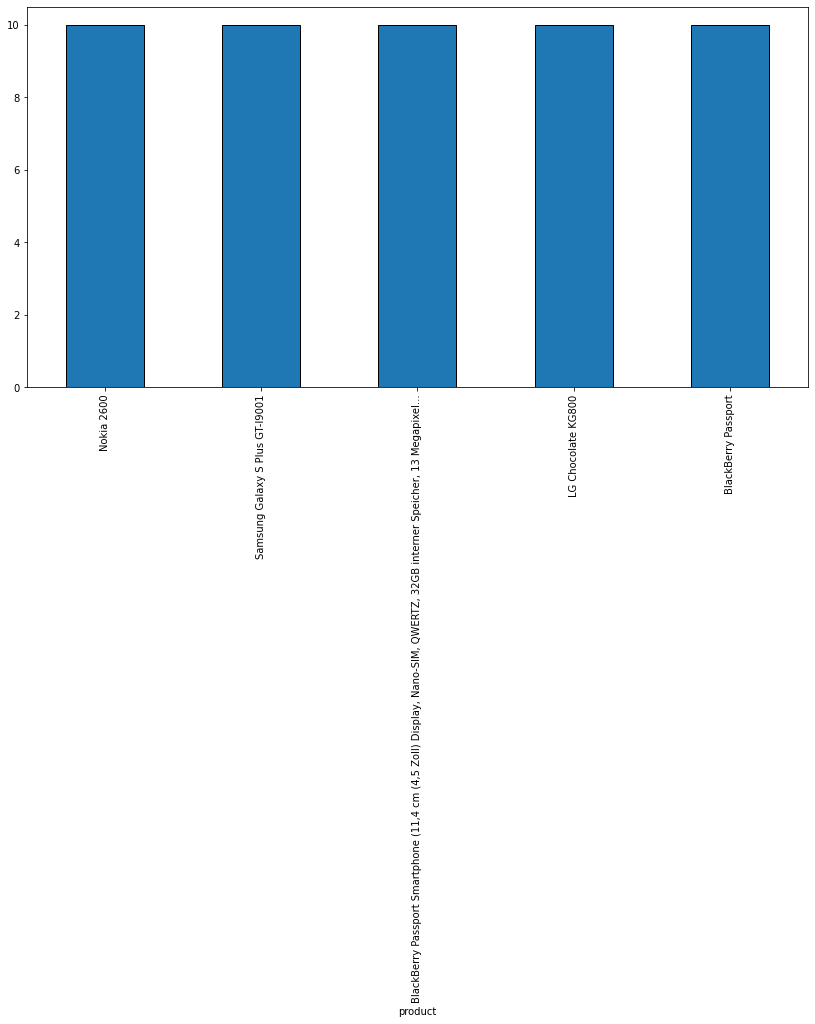

In [64]:
# Top 5 recomendation by mean score of the product 
df2.groupby('product')['score'].mean().sort_values(ascending=False).head().plot(kind='bar',figsize=(14,7));

Top 5 recomendation by mean score of the product is shown in above figure

In [28]:
score_mean_count = pd.DataFrame(df2.groupby('product')['score'].mean()).sort_values('score',ascending=False)

In [29]:
# Top 5 recomendation by top count of the product 
score_mean_count['score_counts'] = pd.DataFrame(df2.groupby('product')['score'].count()).sort_values('score',ascending=False)
print(score_mean_count.shape)
score_mean_count.head()

(3879, 2)


,score,score_counts
product,,
"Microsoft Nokia A00014805 108 Handy (4,6 cm (1,8 Zoll) QQVGA-Display, 160 x 128 Pixel, UKW-Radio, VGA Kamera ohne Blitz, Dual-SIM) schwarz",10.0,4
Samsung Galaxy S III 16GB (Verizon),10.0,6
BlackBerry Bold 9780,10.0,1
"Samsung Galaxy Nexus i9250 Smartphone (11,8 cm (4,65 Zoll) Touchscreen, 16GB interner Speicher, 5 Megapixel Kamera, Android 4.0) chic-white",10.0,2
Huawei Ascend P1 XL,10.0,1


Top 5 recomendation by mean count of the product is shown in above figure

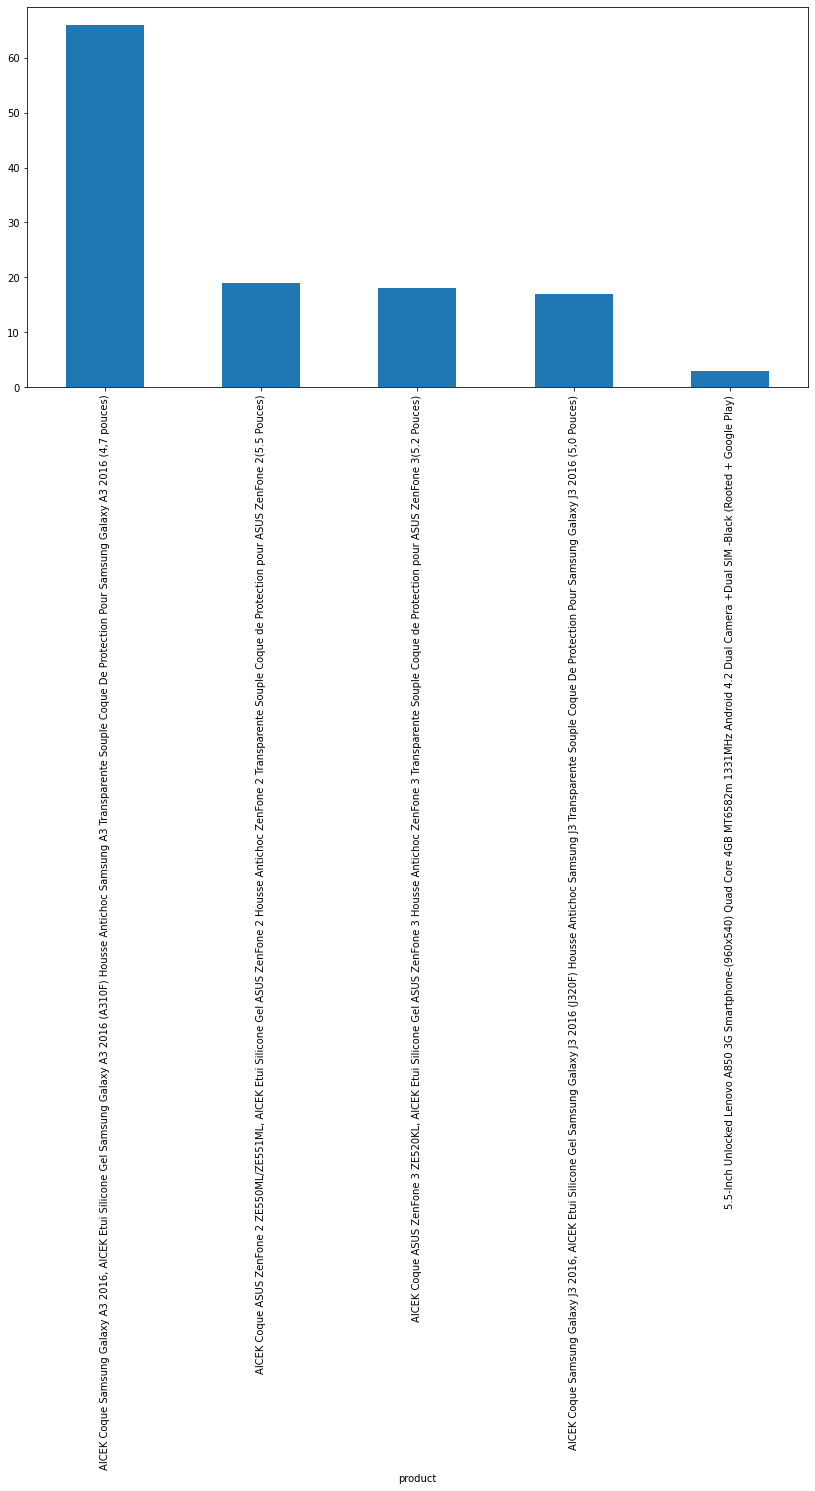

In [30]:
df2.groupby('product')['score'].count().head().sort_values(ascending=False).plot(kind='bar',figsize=(14,7));

<Figure size 576x432 with 0 Axes>

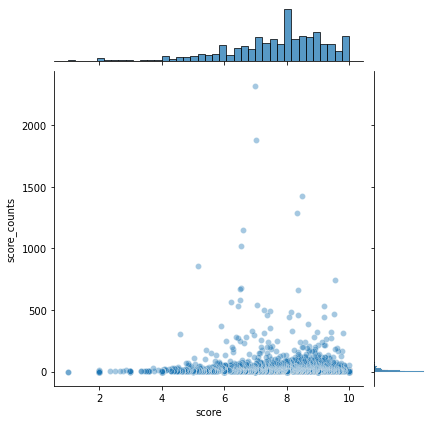

In [31]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='score', y='score_counts', data=score_mean_count, alpha=0.4);

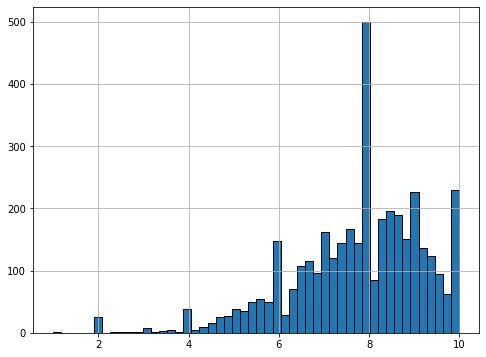

In [32]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
score_mean_count['score'].hist(bins=50);

## 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [33]:
# Using filtered datset that is products having more than 50 ratings and users who have given more than 50 ratings
print(df2.shape)
df2.head()

(96150, 3)


,author,product,score
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
47652,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2.0
28936,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10.0
353663,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...,8.0
224123,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",8.0


In [34]:
pip install surprise

     |████████████████████████████████| 11.8MB 363kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617594 sha256=e4c22efa30cb847a9b5bad53534a25f06f6b6b406766cce75702709719f8779c
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [35]:
# takign the sample of the data from main dataframe
data = df2.copy(deep=True)

In [36]:
print(data.shape)

(96150, 3)


In [37]:
data.head()

,author,product,score
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10.0
47652,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2.0
28936,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10.0
353663,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...,8.0
224123,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",8.0


## SVD Based Recommendation System

In [38]:
#Importing the surprise library 
from surprise import Dataset, Reader

reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(df2[['author', 'product','score']], reader)

In [39]:
# Spliting the data into training and testing set
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25, random_state=612)

In [40]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x7fe778354850>

In [41]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(0))

Client d'Amazon
LG - G3 - Smartphone DÃ©bloquÃ© 4G (Ecran 5,5 Pouces - 32 Go - Android 4.4.2 KitKat) - Gris


In [42]:
# Importing the SVD, KNNWithMeans for model building 
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [43]:
# Fitting the model for prediction 
svd_model = SVD(n_factors=5, biased=False)

In [44]:
# Fiting training set to SVD model
svd_model.fit(trainset)

In [45]:
# Test Data sample
testset[1]

('Amazon Customer', 'Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)', 10.0)

In [46]:
# Testing on test data
test_predict = svd_model.test(testset)

In [47]:
# Computing the RMSE
accuracy.rmse(test_predict)

RMSE: 2.7880


2.7879691945934733

Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable. Both the MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better

In [48]:
test_predict[0:10]

[Prediction(uid='ÐœÐ°ÐºÑ\x81Ð¸Ð¼', iid='Samsung Galaxy S5 SM-G900F 16GB (Ð·Ð¾Ð»Ð¾Ñ‚Ð¸Ñ\x81Ñ‚Ñ‹Ð¹)', r_ui=5.0, est=8.11915369229447, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)', r_ui=10.0, est=5.462703437536058, details={'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Honor 7 - Smartphone libre de 5.2" (4G, WiFi, Bluetooth, Dual Nano SIM, HiSilicon Kirin 935, 64 bit Super 8+1 Core, 2.2 GHz, 3 GB de RAM, 16 GB ROM, cÃ¡mara de 20 MP/8 MP, Android 5.0 con EMUI 3.1), color gris', r_ui=10.0, est=8.643111626773846, details={'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone LG L90 D410', r_ui=8.0, est=9.162985278206488, details={'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Nokia Lumia 530', r_ui=8.0, est=8.581055303863442, details={'was_impossible': False}),
 Prediction(uid='e-bit', iid='Celular Motorola EX115', r_ui=8.0, est=7.614992146863513, details={'was_

## Generating top 5 recommendations

In [49]:
prediction = pd.DataFrame(test_predict)
prediction[prediction['uid']== 'Amazon Customer'][['iid', 'r_ui', 'est']].sort_values('r_ui',ascending=False).head()

,iid,r_ui,est
1,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",10.0,5.462703
12478,"Lenovo Phab 2 Plus Smartphone (Grey, JBL earph...",10.0,6.413872
12579,OnePlus X (Limited Edition Ceramic),10.0,7.054094
12578,"Samsung Galaxy Note 4, Frosted White 32GB (Spr...",10.0,6.966095
12577,"Samsung Galaxy Mega I9152 5.8"" Android Smart P...",10.0,4.109582


# KNNWithMeans Recommendation System (Item Based)

In [50]:
# Importing the KNNWithMeans for model building
from surprise import KNNWithMeans
from surprise import accuracy

In [51]:
# Fitting the model 
algo_i = KNNWithMeans(k=10, sim_options={'user based':False})

In [52]:
algo_i.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [65]:
# Predicting on testing Data
test_predict1 = algo_i.test(testset)
print(accuracy.rmse(test_predict1))

RMSE: 2.7928
2.7927972018989866


In [54]:
test_predict1[0:10]

[Prediction(uid='ÐœÐ°ÐºÑ\x81Ð¸Ð¼', iid='Samsung Galaxy S5 SM-G900F 16GB (Ð·Ð¾Ð»Ð¾Ñ‚Ð¸Ñ\x81Ñ‚Ñ‹Ð¹)', r_ui=5.0, est=7.931962435887415, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)', r_ui=10.0, est=6.4, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='Cliente Amazon', iid='Honor 7 - Smartphone libre de 5.2" (4G, WiFi, Bluetooth, Dual Nano SIM, HiSilicon Kirin 935, 64 bit Super 8+1 Core, 2.2 GHz, 3 GB de RAM, 16 GB ROM, cÃ¡mara de 20 MP/8 MP, Android 5.0 con EMUI 3.1), color gris', r_ui=10.0, est=8.6, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone LG L90 D410', r_ui=8.0, est=9.8, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Nokia Lumia 530', r_ui=8.0, est=7.8, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='e-bit', iid='Celular Motorola EX115', r_ui=8.0, est=7.0, det

#### Generating top 5 recommendations¶

In [55]:
predict = pd.DataFrame(test_predict1)

In [56]:
predict[predict['uid']=='Ana'][['iid', 'r_ui','est']].sort_values(by='r_ui', ascending=False).head()

,iid,r_ui,est
6,Huawei P8 grijs / 16 GB,10.0,8.726828
3932,LG Nexus 5 - Smartphone libre Android (pantall...,10.0,9.322837
6769,Samsung Galaxy S7 edge SM-G935F 32GB Smartphon...,10.0,9.659403
8044,Samsung Galaxy S III mini (I8190) - Smartphone...,10.0,6.950748
9171,Smartphone Samsung Galaxy Core Plus Preto com ...,10.0,10.000000


 # KNNWithMeans Recommendation System (User Based)

In [57]:
algo_ii = KNNWithMeans(k=10, sim_options={'user based':True})

In [58]:
algo_ii.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [66]:
test_predict2 = algo_ii.test(testset)
print(accuracy.rmse(test_predict2))

RMSE: 2.7928
2.7927972018989866


RMSE is calculated by looking at predicted ratings versus their hidden ground-truth. So a sparse dataset may only have very few hidden ratings to predict, or your algorithm may not be able to predict for many hidden ratings because there's no correlation to other ratings.

#### Generating top 5 recommendations

In [60]:
predict2 = pd.DataFrame(test_predict2)

In [61]:
predict2[predict2['uid'] == 'Amazon Customer'][['iid', 'r_ui','est']].sort_values(by='r_ui', ascending=False).head()

,iid,r_ui,est
1,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",10.0,6.400000
12478,"Lenovo Phab 2 Plus Smartphone (Grey, JBL earph...",10.0,8.000000
12579,OnePlus X (Limited Edition Ceramic),10.0,7.600000
12578,"Samsung Galaxy Note 4, Frosted White 32GB (Spr...",10.0,6.000000
12577,"Samsung Galaxy Mega I9152 5.8"" Android Smart P...",10.0,2.227299


## 9. Try cross validation techniques to get better results

In [62]:
from surprise.model_selection import cross_validate

In [67]:
svd = SVD()
print(cross_validate(svd, data ,measures=['RMSE', 'MAE'], cv=5, verbose=True  ))

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.7239  2.6902  2.7146  2.7139  2.6941  2.7073  0.0130  
MAE (testset)     2.1378  2.1122  2.1222  2.1254  2.0971  2.1189  0.0136  
Fit time          4.81    4.92    4.82    4.82    4.86    4.84    0.04    
Test time         0.23    0.41    0.22    0.20    0.30    0.27    0.08    
{'test_rmse': array([2.72386103, 2.69017382, 2.71457417, 2.71386094, 2.69405867]), 'test_mae': array([2.13784652, 2.11218141, 2.12220144, 2.12536205, 2.09714515]), 'fit_time': (4.808341979980469, 4.915910243988037, 4.819014549255371, 4.820674180984497, 4.858044147491455), 'test_time': (0.23222804069519043, 0.4148721694946289, 0.219282865524292, 0.19899654388427734, 0.30443429946899414)}


Cross-validation procedures can be run very easily using powerful CV iterators (inspired by scikit-learn excellent tools), as well as exhaustive search over a set of parameters 


## 10. In what business scenario you should use popularity based Recommendation Systems ?

It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those. It is recomended for specific topics like restaurants and online dating.

## 11. In what business scenario you should use CF based Recommendation Systems ?

There are two types of Collaborative filtering:

User based: It is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user.

Item Based: Item-item collaborative filtering, or item-based, or item-to-item, is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.

Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation systems. We can use this technique to build recommenders that give suggestions to a user on the basis of the likes and dislikes of similar users.

## 12. What other possible methods can you think of which can further improve the recommendation for different users 

The following other methods are for Recommendation system:

a)  Hybrid filtering: Hybrid filtering technique combines different recommendation techniques in order to gain better system optimization to avoid some limitations and problems of pure recommendation systems. The idea behind hybrid techniques is that a combination of algorithms will provide more accurate and effective recommendations than a single algorithm as the disadvantages of one algorithm can be overcome by another algorithm. Using multiple recommendation techniques can suppress the weaknesses of an individual technique in a combined model. The combination of approaches can be done in any of the following ways: separate implementation of algorithms and combining the result, utilizing some content-based filtering in collaborative approach, utilizing some collaborative filtering in content-based approach, creating a unified recommendation system that brings together both approaches. 

In [63]:
! jupyter nbconvert --to html Project_Recommendation_By_AjayKumar.ipynb